<a href="https://colab.research.google.com/github/Jennydia/Bono-Parcial-Topicos-/blob/main/Bono%20para%20pacial%20parte%202%20Jenny%20Diaz%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


Estadistica descriptiva para variables cualitativas

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving asriosgu_nac2020.csv to asriosgu_nac2020.csv


In [4]:
io_csv = io.BytesIO(uploaded['asriosgu_nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [5]:
tabla1 = tabla[["EDAD_MADRE", "T_GES", "TALLA_NAC"]]
tabla1.head(4)

,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
44,4,6,9
44,4,6,9
44,5,6,9
44,5,6,9


In [6]:
df2 = tabla1[(tabla1.EDAD_MADRE < 99) & (tabla1["T_GES"] != 9) & (tabla1.TALLA_NAC != 9)]
df2.head(4)

,EDAD_MADRE,T_GES,TALLA_NAC
COD_DPTO,,,
52,5,4,4
20,4,4,5
27,3,4,5
27,5,4,4


**¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)? **

In [7]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-7-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [22]:
df2.loc[df2['T_GES'] == "1", "Tiempo de gestacion"] = "0-22"
df2.loc[df2['T_GES'] == "2", "Tiempo de gestacion"] = "22-27"
df2.loc[df2['T_GES'] == "3", "Tiempo de gestacion"] = "28-37"
df2.loc[df2['T_GES'] == "4", "Tiempo de gestacion"] = "38-41"
df2.loc[df2['T_GES'] == "5", "Tiempo de gestacion"] = "42-100"
df2.loc[df2['T_GES'] == "9", "Tiempo de gestacion"] = "NA"
print(df2.head(5))

          EDAD_MADRE T_GES  TALLA_NAC Tiempo de gestacion Tiempo de Gestacion
COD_DPTO                                                                     
52                 5     4          4               38-41               38-41
20                 4     4          5               38-41               38-41
27                 3     4          5               38-41               38-41
27                 5     4          4               38-41               38-41
27                 3     4          5               38-41               38-41


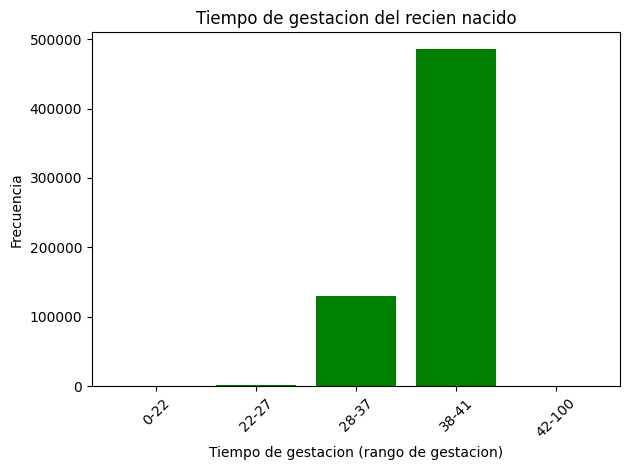

In [25]:
value_counts = df2['Tiempo de gestacion'].value_counts().sort_index()

# Convertir los valores a enteros
y_values = value_counts.astype(int)

# Crear el gráfico de barras
x_values = y_values.index

plt.bar(x_values, y_values, color="green")
plt.title('Tiempo de gestacion del recien nacido')
plt.xlabel('Tiempo de gestacion (rango de gestacion)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad si es necesario
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

El valor de 38-41  es el rango en donde se encuentra mayor frecuencia de gestacion  . En rango de edad de 28-37 (semanas) se tienen aproximadamente 150000 .Los rangos de gestaciones de 0-22, 22-27 y 42 o mas tiene poca frecuencia

In [26]:
sizes = np.array(y_values)
sizes

array([    28,   2236, 130484, 485426,   1163])

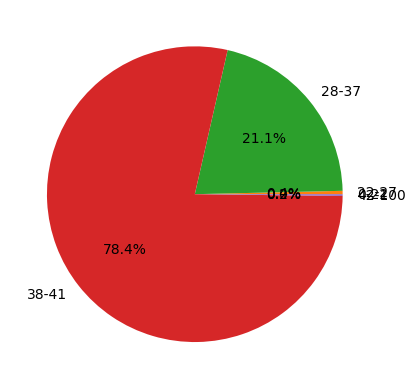

In [27]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [28]:
len(df2.T_GES)

620798

In [29]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

Index(['0-22', '22-27', '28-37', '38-41', '42-100'], dtype='object', name='Tiempo de gestacion')
[0.004510323809032889, 0.3601815727499122, 21.018753282065987, 78.19387304727141, 0.18733952106804466]


Aproximadamente el 0.04 % de las mujeres presenta un tiempo de gestacion de 0-22 semanas  , el 0.3 % entre 22-27 semanas , el 21 % entre 28-37 semanas,  el 78 % entre 38-41 semanas y el 0.1% entre 42 o mas semanas

**¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia
(TALLA_NAC)?**

In [30]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)


<ipython-input-30-ef3f15f7d308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [32]:
df2.loc[df2['TALLA_NAC'] == "1", "Talla del recien nacido "] = "0-20"
df2.loc[df2['TALLA_NAC'] == "2", "Talla del recien nacido"] = "20-29"
df2.loc[df2['TALLA_NAC'] == "3", "Talla del recien nacido"] = "30-39"
df2.loc[df2['TALLA_NAC'] == "4", "Talla del recien nacido"] = "40-49"
df2.loc[df2['TALLA_NAC'] == "5", "Talla del recien nacido"] = "50-59"
df2.loc[df2['TALLA_NAC'] == "6", "Talla del recien nacido "] = "42-100"
df2.loc[df2['TALLA_NAC'] == "9", "Talla del recien nacido"] = "NA"

<ipython-input-32-4cd46ad15537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['TALLA_NAC'] == "1", "Talla del recien nacido "] = "0-20"
<ipython-input-32-4cd46ad15537>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['TALLA_NAC'] == "2", "Talla del recien nacido"] = "20-29"


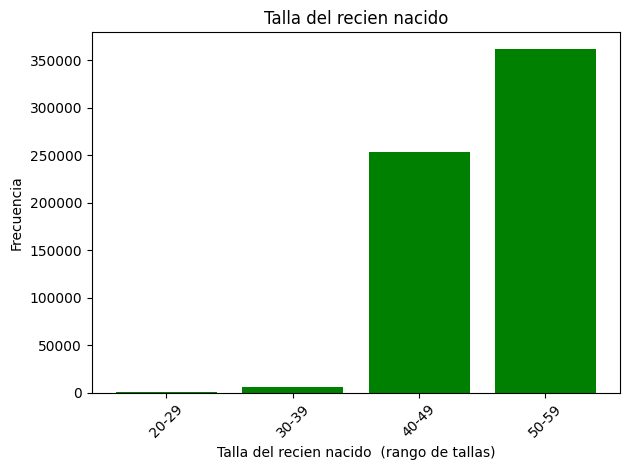

In [34]:
value_counts = df2['Talla del recien nacido'].value_counts().sort_index()

# Convertir los valores a enteros
y_values = value_counts.astype(int)

# Crear el gráfico de barras
x_values = y_values.index

plt.bar(x_values, y_values, color="green")
plt.title('Talla del recien nacido')
plt.xlabel('Talla del recien nacido  (rango de tallas)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad si es necesario
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

la talla mas frecuente es de 50-59, ademas 250000 recien nacidos miden entre los 40-49 , y la talla menos frecuente es de 20-29 y 30-39

In [35]:
sizes = np.array(y_values)
sizes

array([   477,   5716, 253062, 361426])

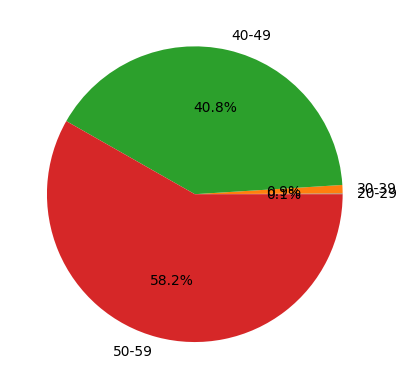

In [36]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [37]:
len(df2.TALLA_NAC)


620798

In [38]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)


Index(['20-29', '30-39', '40-49', '50-59'], dtype='object', name='Talla del recien nacido')
[0.07683658774673888, 0.9207503890154286, 40.7639844200529, 58.21958189298291]


Aproximadamente el 0.07 de los recien nacidos miden entre los 20-29 , el 9% estan entre 30-39 , el 40% estan entre 40-49 y el 58% entre los 50-59

**¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una variable de la otra o qué tan asociadas están ambas?
**

In [39]:

df2.head(3)


,EDAD_MADRE,T_GES,TALLA_NAC,Tiempo de gestacion,Tiempo de Gestacion,Talla del recien nacido,Talla del recien nacido
COD_DPTO,,,,,,,
52,5,4,4,40-49,38-41,NaN,40-49
20,4,4,5,50-59,38-41,NaN,50-59
27,3,4,5,50-59,38-41,NaN,50-59


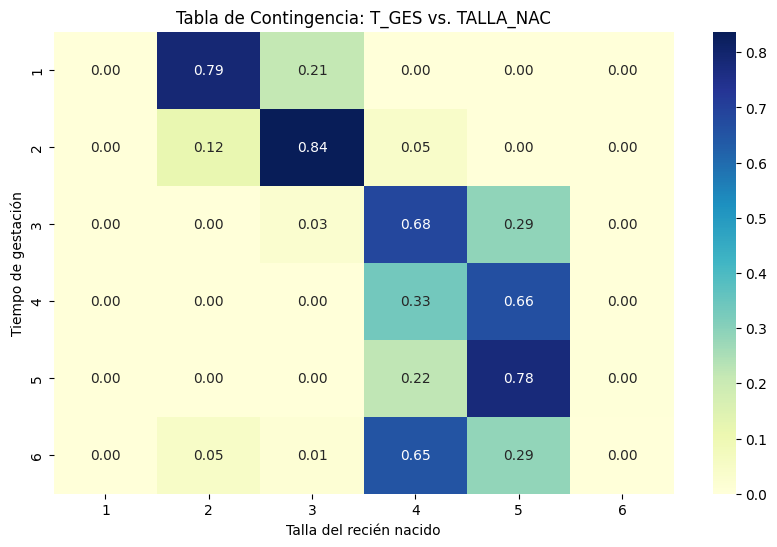

In [43]:
tabla_contingencia = pd.crosstab(df2['T_GES'], df2['TALLA_NAC'], normalize='index')  # Normaliza por filas (proporciones)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap='YlGnBu', fmt=".2f")  # cmap es el mapa de color, fmt=".2f" para mostrar dos decimales
plt.title('Tabla de Contingencia: T_GES vs. TALLA_NAC')
plt.xlabel('Talla del recién nacido')
plt.ylabel('Tiempo de gestación')
plt.show()

In [44]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 3103990.0 y el valor p es d 0.0


Como el valor p es menor a 0.05 entonces se rechaza la hipotesis nula de que la el tiempo de gestacion y la talla del recien nacido esten asociadas